Importing the dependencies

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


Data Collection and Processing

In [42]:
loan_dataset=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [43]:
loan_dataset.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
535,LP002732,Male,No,0,Not Graduate,NaN,2550,2042.0,126.0,360.0,1.0,Rural,Y
311,LP002004,Male,No,0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban,Y
505,LP002622,Male,Yes,2,Graduate,No,3510,4416.0,243.0,360.0,1.0,Rural,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
340,LP002115,Male,Yes,3+,Not Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural,N


In [44]:
loan_dataset.shape

(614, 13)

In [ ]:
# statistical measures

In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#dropping the missing values
loan_dataset=loan_dataset.dropna()

In [ ]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# label encoding

In [ ]:
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

# we can also use sklearn function label encoding
# from sklearn.preprocessing import LabelEncoder


/tmp/ipython-input-3923209932.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# with dependents
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
# with dependents replacing 3+ to 4 making it numerical value
loan_dataset=loan_dataset.replace(value=4,to_replace='3+')

In [ ]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [ ]:
# data visualization

<Axes: xlabel='Education', ylabel='count'>

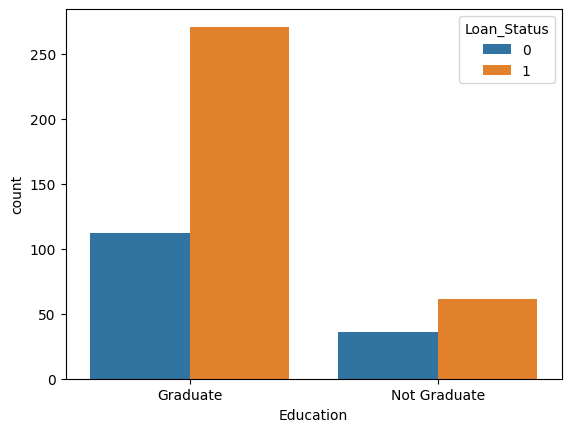

In [ ]:
# education and loan_status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

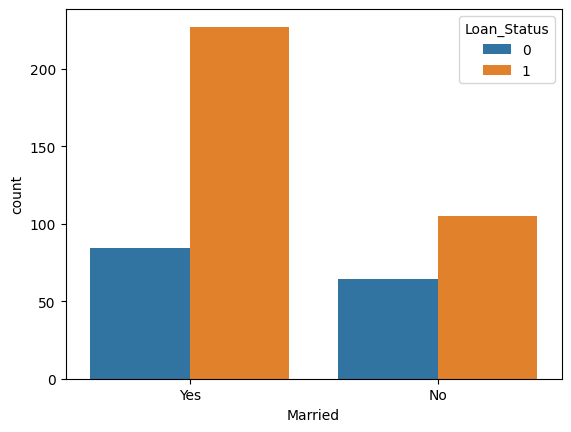

In [ ]:
# for marital status and loan_status

sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

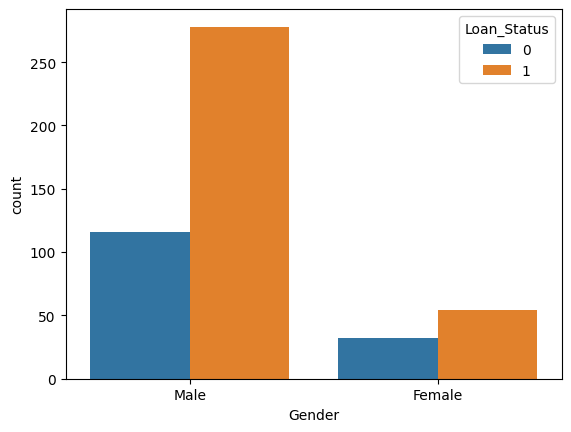

In [ ]:


# for gender
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Dependents', ylabel='count'>

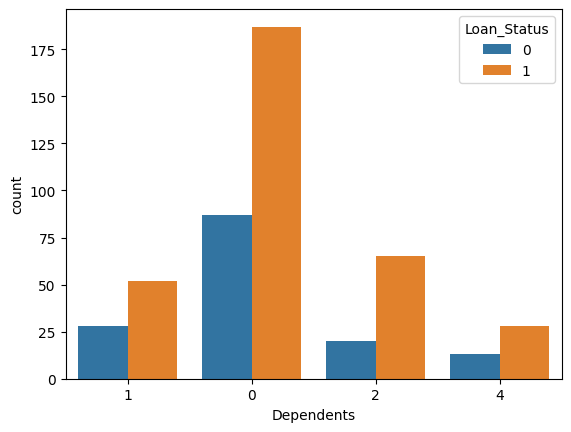

In [ ]:
#for Dependents
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

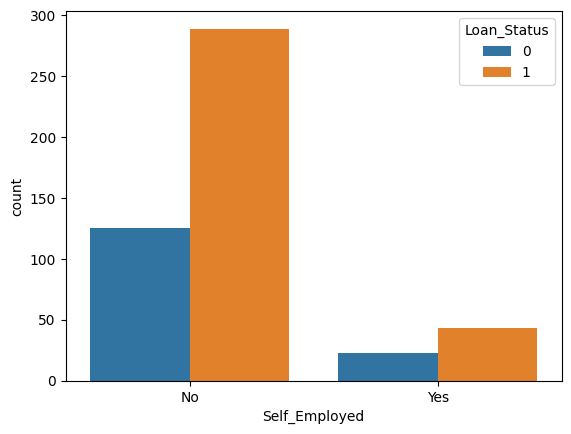

In [ ]:
# for Self_Employed
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

In [ ]:
# convert catogorical columns to numerical columns
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

/tmp/ipython-input-1527897115.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


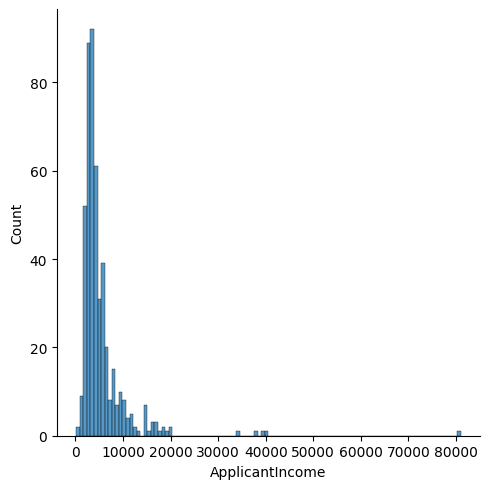

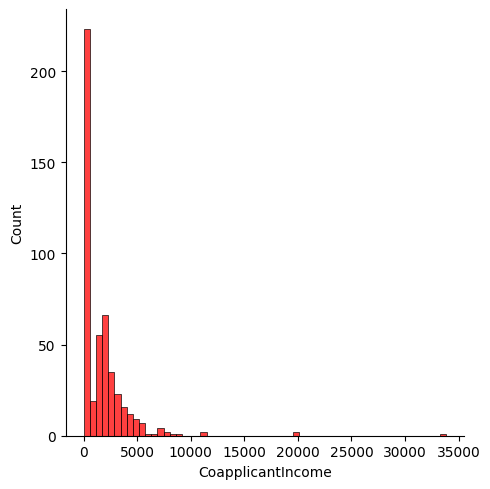

In [ ]:
# checking range of income
sns.displot(x='ApplicantIncome',data=loan_dataset)
sns.displot(x='CoapplicantIncome',data=loan_dataset,color='red')


In [ ]:
# spliting data
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'])
Y=loan_dataset['Loan_Status']

Test Train Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2,stratify=Y)


In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
122,0,0,0,1,0,2137,8980.0,137.0,360.0,0.0,1
498,1,1,1,1,1,2895,0.0,95.0,360.0,1.0,1
144,1,1,2,1,0,11757,0.0,187.0,180.0,1.0,2
217,1,1,0,1,0,3727,1775.0,131.0,360.0,1.0,1
362,1,1,0,1,0,4750,2333.0,130.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,0,1,0,3500,0.0,81.0,300.0,1.0,1
390,1,0,4,1,0,9167,0.0,185.0,360.0,1.0,0
76,1,0,0,1,0,3750,4750.0,176.0,360.0,1.0,2
286,0,0,0,1,1,2600,1717.0,99.0,300.0,1.0,1


Training the model
SVM

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# Model Evaluation


In [ ]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [ ]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


Making predictive data